In [283]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [284]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
import eli5


from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc


random_state=42
np.random.seed(random_state)

In [285]:
df=pd.read_csv(r'C:\Users\Shayeda\Documents\DATAMITES INTERN\Data\cust_train.csv')

In [79]:
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [125]:
df.shape[1]

202

In [81]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [138]:
max_value=[]
for i in range(1,200):
    max_value.append(df["var_"+str(i)].max())
    print("var_"+str(i)+" - " , max_value[i-1])

var_1 -  10.3768
var_2 -  19.353
var_3 -  13.1883
var_4 -  16.6714
var_5 -  17.2516
var_6 -  8.4477
var_7 -  27.6918
var_8 -  10.1513
var_9 -  11.1506
var_10 -  18.6702
var_11 -  17.1887
var_12 -  14.6545
var_13 -  22.3315
var_14 -  14.9377
var_15 -  15.8633
var_16 -  17.9506
var_17 -  19.0259
var_18 -  41.748
var_19 -  35.183
var_20 -  31.2859
var_21 -  49.0443
var_22 -  14.5945
var_23 -  4.8752
var_24 -  25.446
var_25 -  14.6546
var_26 -  15.6751
var_27 -  3.2431
var_28 -  8.7874
var_29 -  13.1431
var_30 -  15.6515
var_31 -  20.1719
var_32 -  6.7871
var_33 -  29.5466
var_34 -  13.2878
var_35 -  21.5289
var_36 -  14.2456
var_37 -  11.8638
var_38 -  29.8235
var_39 -  15.3223
var_40 -  18.1056
var_41 -  26.1658
var_42 -  13.4696
var_43 -  12.5779
var_44 -  34.1961
var_45 -  62.0844
var_46 -  21.2939
var_47 -  20.6854
var_48 -  54.2738
var_49 -  41.153
var_50 -  15.3172
var_51 -  40.689
var_52 -  17.0968
var_53 -  8.2315
var_54 -  28.5724
var_55 -  29.0921
var_56 -  29.0741
var_57 -  9.1

In [144]:
max_value.index(max(max_value))+1

120

In [82]:
print(color.BOLD +'Categorical variables are - '+ color.END)
print(df.columns[df.dtypes=='object'])
print()
print(color.BOLD +'Numerical variables are - '+ color.END)
print(df.columns[df.dtypes!='object'])

Categorical variables are - 
Index(['ID_code'], dtype='object')

Numerical variables are - 
Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)


In [83]:
cat_vars=df.columns[df.dtypes=='object']
num_vars=df.columns[df.dtypes!='object']

In [84]:
df[num_vars].isnull().sum().sort_values(ascending=False)

target     0
var_137    0
var_127    0
var_128    0
var_129    0
          ..
var_69     0
var_70     0
var_71     0
var_72     0
var_199    0
Length: 201, dtype: int64

In [85]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [86]:
pd.isnull(df.target).any()

False

In [87]:
df.notnull()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
199996,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
199997,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
199998,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [88]:
pd.notnull(df.target) 

0         True
1         True
2         True
3         True
4         True
          ... 
199995    True
199996    True
199997    True
199998    True
199999    True
Name: target, Length: 200000, dtype: bool

In [89]:
df.corr()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


In [90]:
df.corr().abs()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,0.003025,0.019584,...,0.055973,0.047114,0.042858,0.017709,0.022838,0.028285,0.023608,0.035303,0.053000,0.025434
var_0,0.052390,1.000000,0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,0.005373,0.001616,0.001514,0.002073,0.004386,0.000753,0.005776,0.003850
var_1,0.050343,0.000544,1.000000,0.003980,0.000010,0.000303,0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,0.002604,0.001153,0.002557,0.000785,0.000377,0.004157,0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,0.000991,0.002648,...,0.000197,0.001285,0.003400,0.000549,0.002104,0.001070,0.003952,0.001078,0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,0.000322,0.003253,0.000774,0.002500,0.003553,...,0.000151,0.002445,0.001530,0.001699,0.001054,0.001206,0.002800,0.001164,0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,0.000785,0.001070,0.001206,0.003706,0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,0.004745,0.003143,0.001201,1.000000,0.002517,0.004170,0.000536,0.002042
var_196,0.023608,0.004386,0.000377,0.003952,0.002800,0.000513,0.002880,0.005378,0.001045,0.003242,...,0.000847,0.002466,0.001386,0.005308,0.005040,0.002517,1.000000,0.000454,0.000253,0.000607
var_197,0.035303,0.000753,0.004157,0.001078,0.001164,0.000046,0.000535,0.003565,0.003466,0.004583,...,0.004974,0.000906,0.000527,0.005068,0.000884,0.004170,0.000454,1.000000,0.001183,0.004991
var_198,0.053000,0.005776,0.004861,0.000877,0.001651,0.001821,0.000953,0.003025,0.000650,0.002950,...,0.000153,0.000067,0.003451,0.001646,0.003194,0.000536,0.000253,0.001183,1.000000,0.004731


In [91]:
#Target class counts

print(df.target.value_counts())
print(df.target.value_counts()*100/len(df))

0    179902
1     20098
Name: target, dtype: int64
0    89.951
1    10.049
Name: target, dtype: float64


Text(0, 0.5, 'Index')

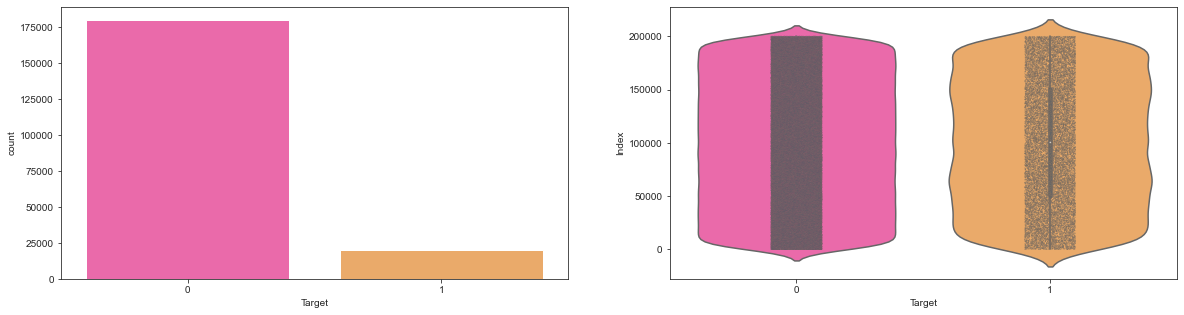

In [94]:
#Count plot & violin plot for target class
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(df.target.values,ax=ax[0],palette='spring')
sns.violinplot(x=df.target.values,y=df.index.values,ax=ax[1],palette='spring')
sns.stripplot(x=df.target.values,y=df.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='spring')
ax[0].set_xlabel('Target')
ax[1].set_xlabel('Target')
ax[1].set_ylabel('Index')

## Observation:

- We are having a unbalanced data, where 90% of the data is no. of customers who will not make a transaction & 10 % of  
  the data are those who will make a transaction.
- From the violin plots, it seems that there is no relationship between the target and index of the data frame, it is 
  more dominated by zero compare to one's.
- From the jitter plots with violin plots, we can observe that target looks uniformly distributed over the indexes of   
  the data frame.

## Distribution of train attributes

In [105]:
%%time 

#Distribution of train attributes-

def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('darkgrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(35,35))
    
    for attribute in train_attributes :
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel(attribute,)
        sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

Wall time: 0 ns


## Observing first 100 train attributes

In [106]:
df[df.target.values==1].var_0

13        16.3699
29         5.3301
63         7.7072
65        10.5358
71         6.7547
           ...   
199966    13.5797
199976     7.9663
199981    12.8140
199986    12.0298
199990    14.1475
Name: var_0, Length: 20098, dtype: float64

In [107]:
df[df.target.values==0].var_0

0          8.9255
1         11.5006
2          8.6093
3         11.0604
4          9.8369
           ...   
199995    11.4880
199996     4.9149
199997    11.2232
199998     9.7148
199999    10.8762
Name: var_0, Length: 179902, dtype: float64

<Figure size 432x288 with 0 Axes>

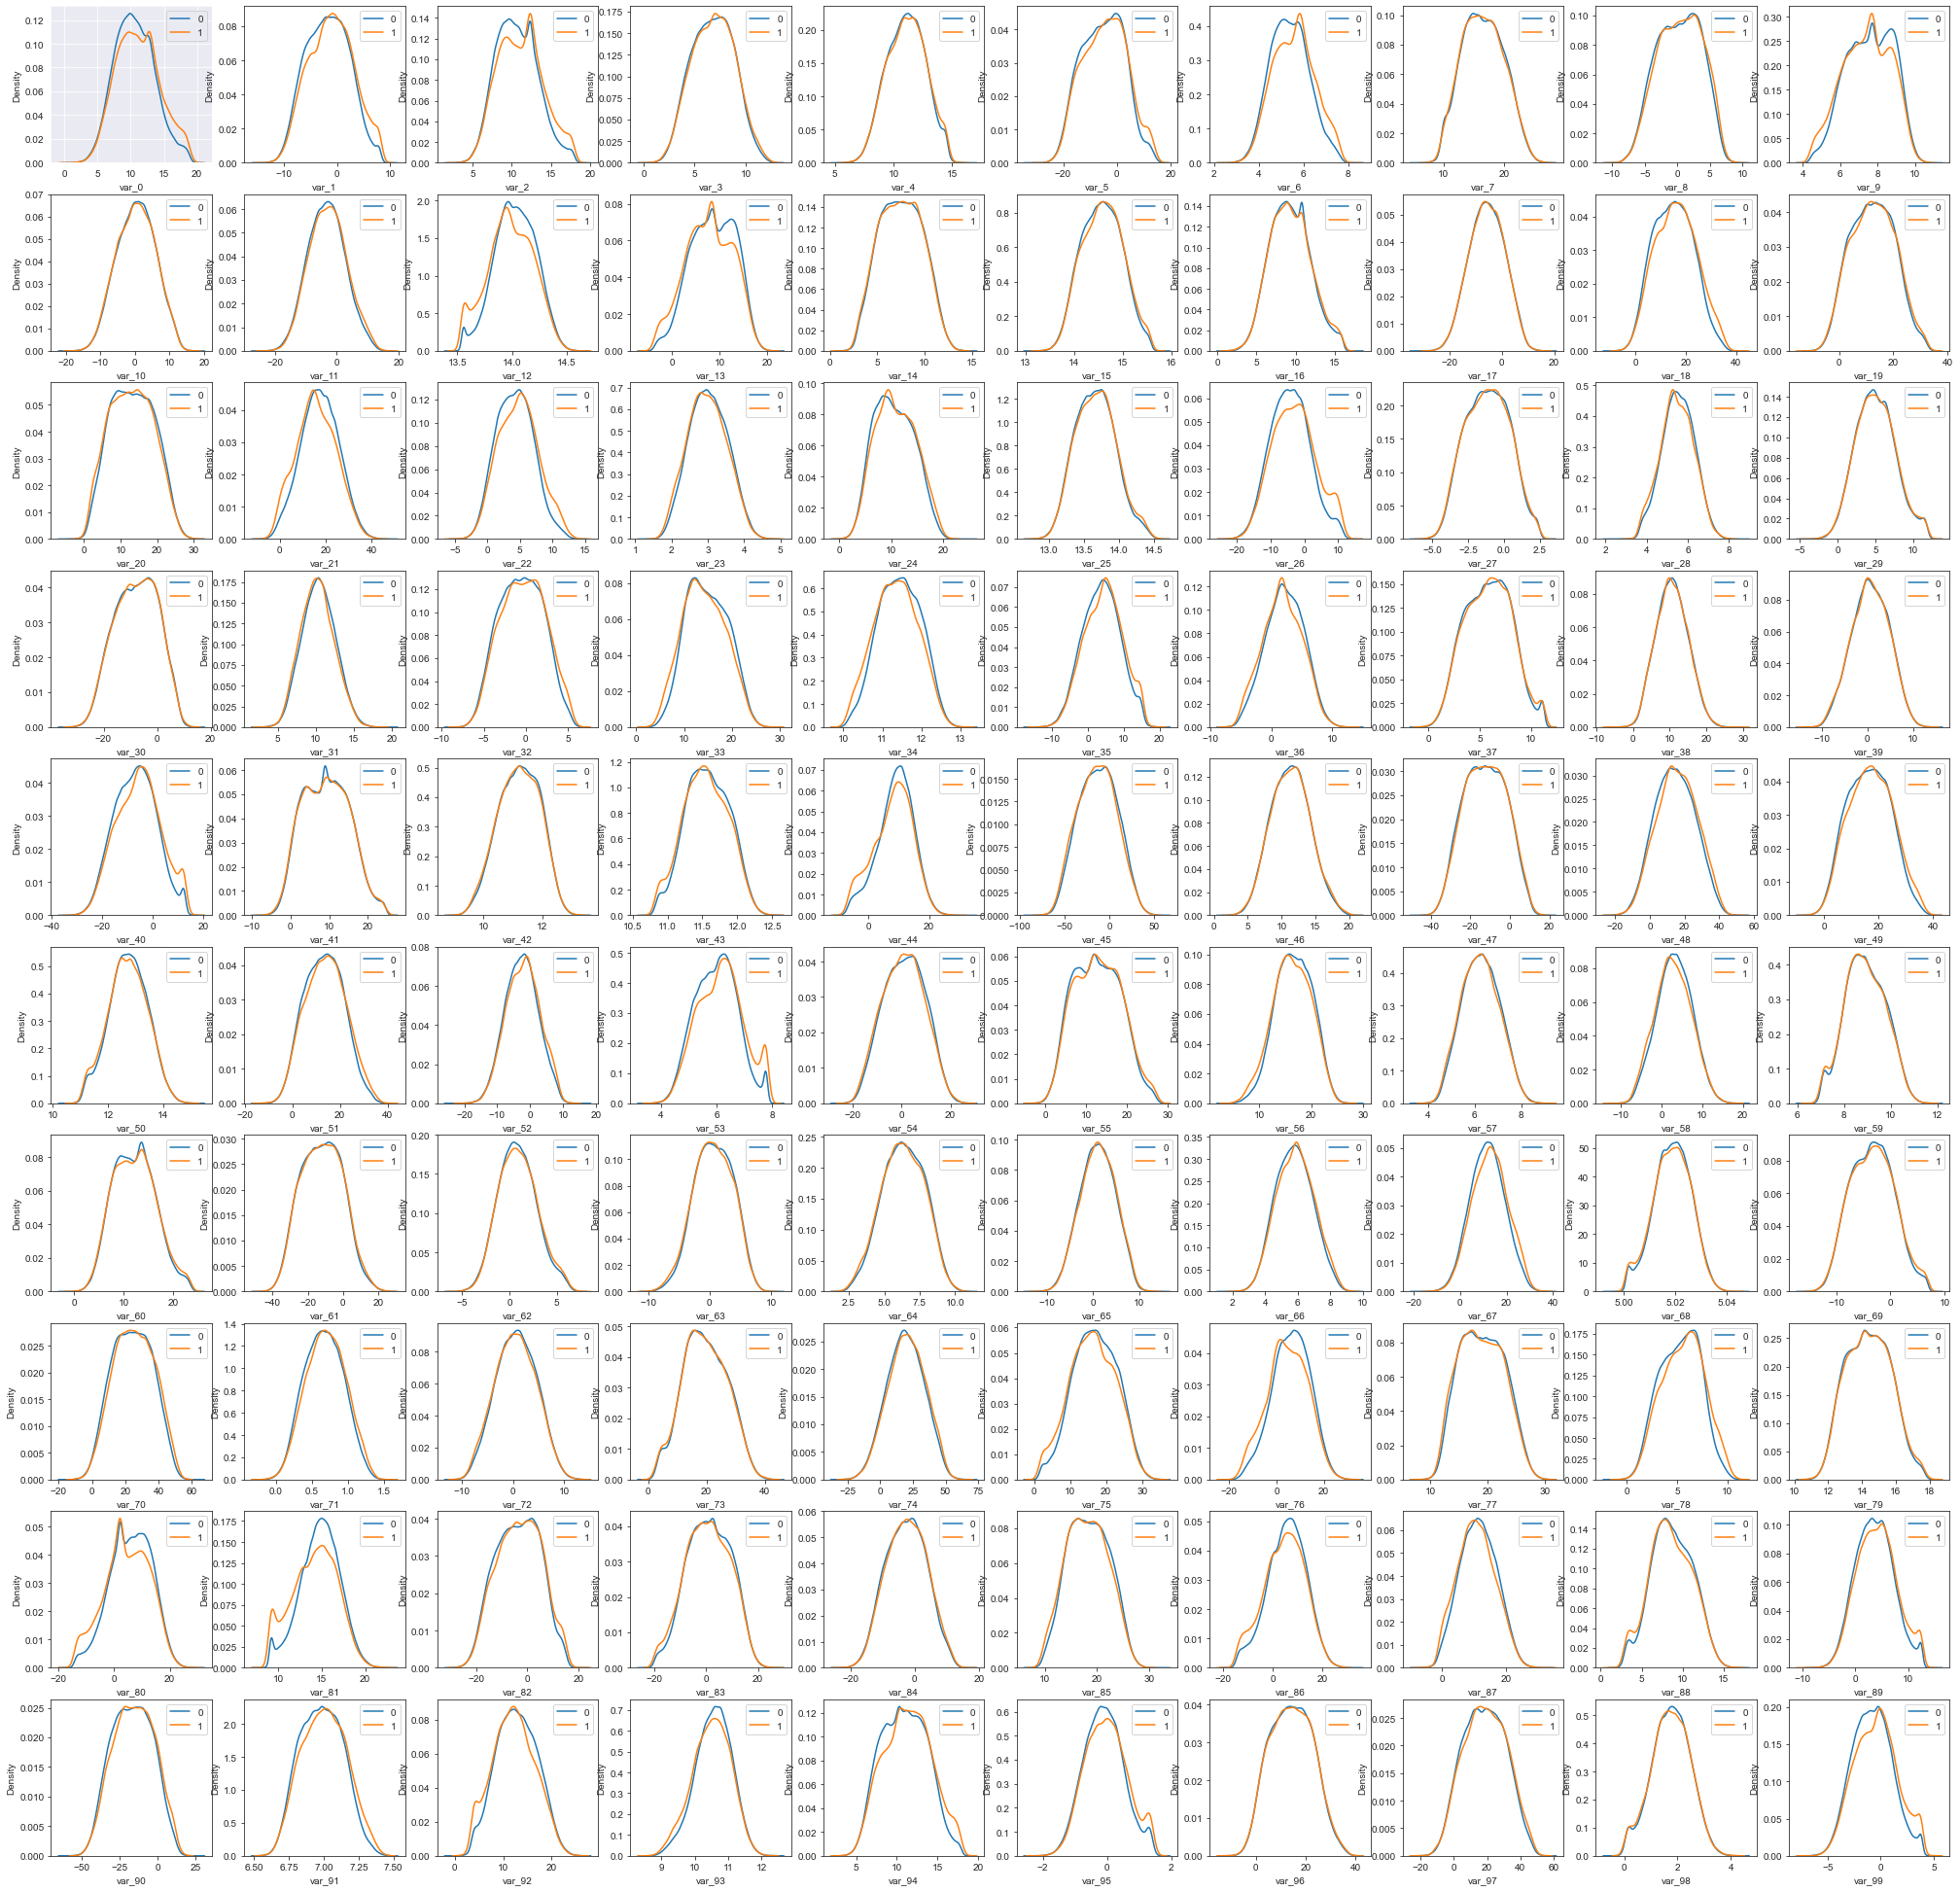

Wall time: 2min 57s


In [108]:
%%time
#Corresponding to negative class-
t0=df[df.target.values==0]

#Corresponding to possitive class-
t1=df[df.target.values==1]

#train attributes from 2 to 102 -
train_attributes=df.columns.values[2:102]

#Plot distribution of train attributes-
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

## Observing next 100 train attributes

<Figure size 432x288 with 0 Axes>

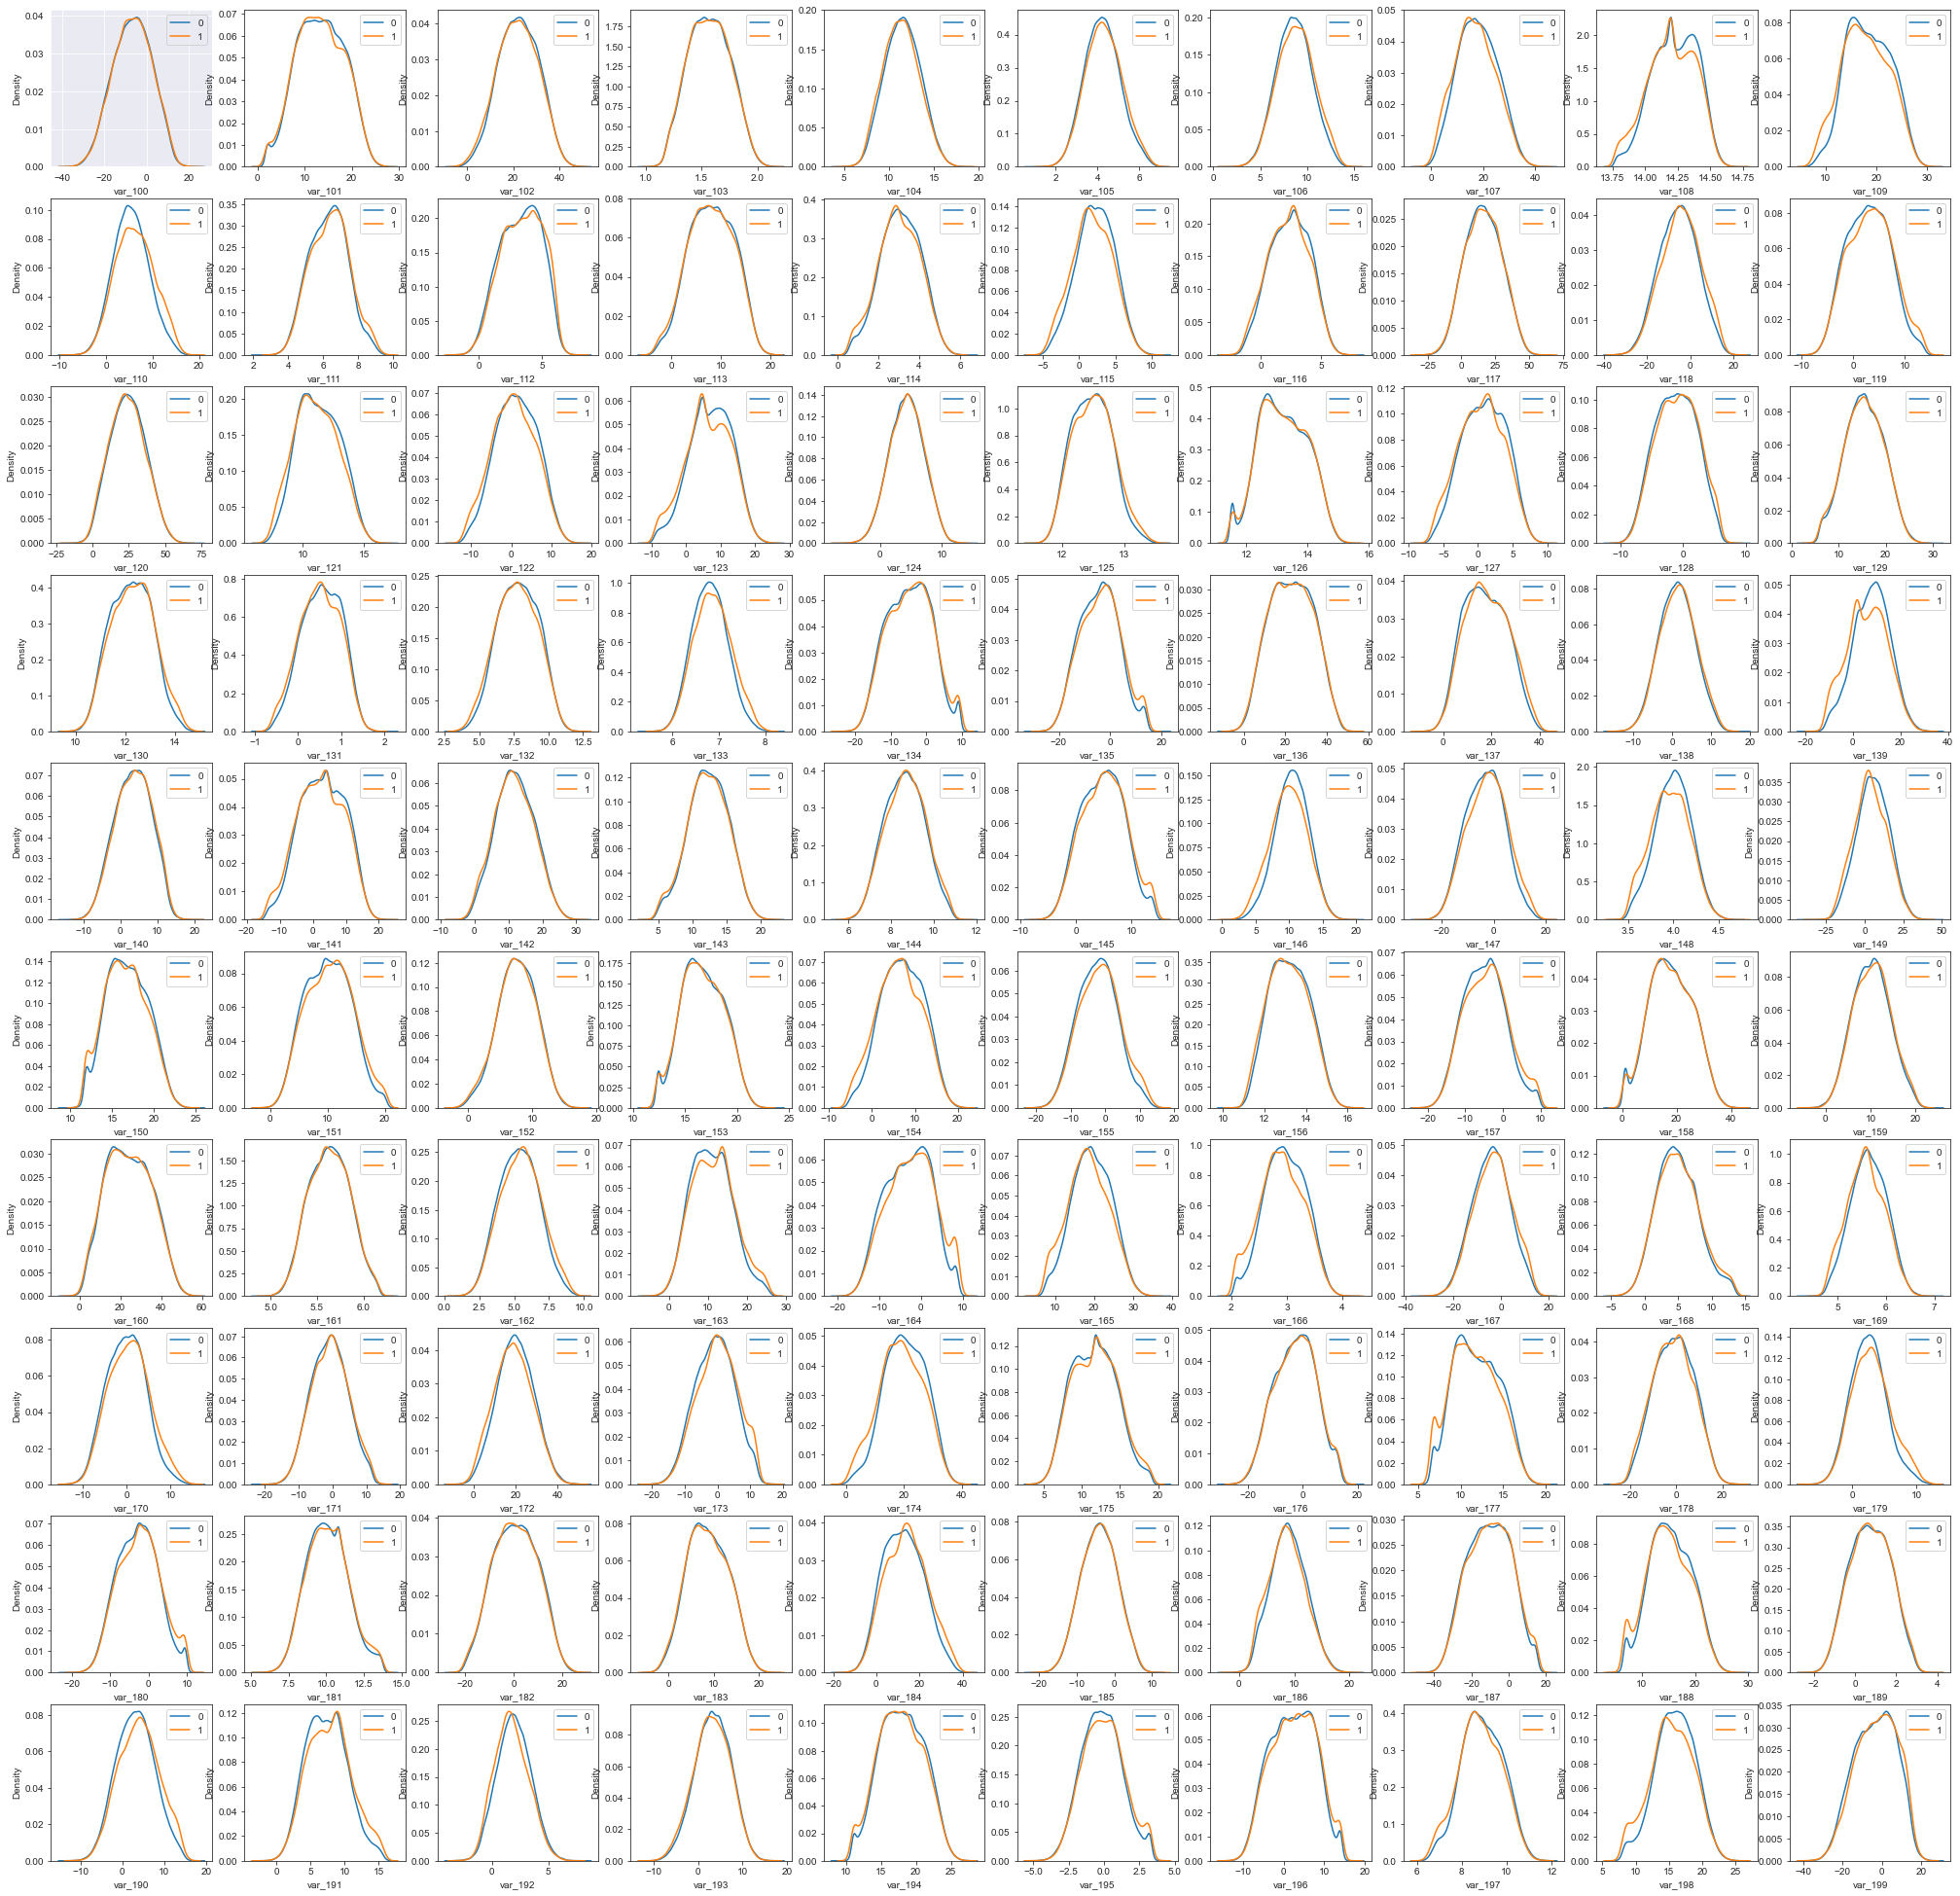

In [109]:
#train attributes from 102 to 202 -
train_attributes=df.columns.values[102:202]

#Plot distribution of train attributes-
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

**Observation:**
    - We can observed that their is a considerable no. of features which are significantly have different distribution for two target variables. For example like var_0,var_1,var_9,var_198 var_180 etc.
    - We can observed that their is a considerable number of features which are significantly have same distribution for two target variables. For example like var_3,var_7,var_10,var_171,var_185 etc.

**Distribution of Mean Values per rows & columns:**

In [147]:
df[train_attributes].mean(axis=0)

var_0      10.679914
var_1      -1.627622
var_2      10.715192
var_3       6.796529
var_4      11.078333
             ...    
var_195    -0.142088
var_196     2.303335
var_197     8.908158
var_198    15.870720
var_199    -3.326537
Length: 200, dtype: float64

In [148]:
df[train_attributes].mean(axis=1)

0         7.281591
1         7.076818
2         6.204483
3         6.441159
4         6.771155
            ...   
199995    6.745412
199996    6.753499
199997    6.874692
199998    6.940879
199999    6.798108
Length: 200000, dtype: float64

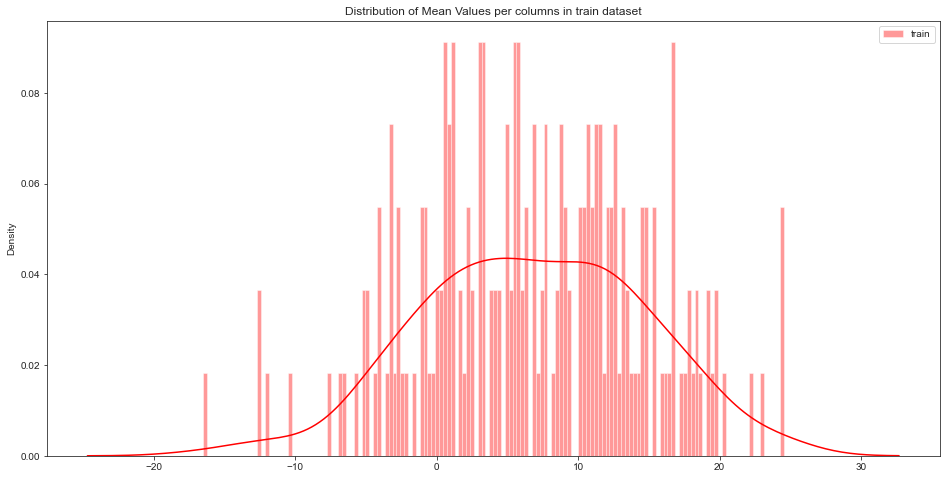

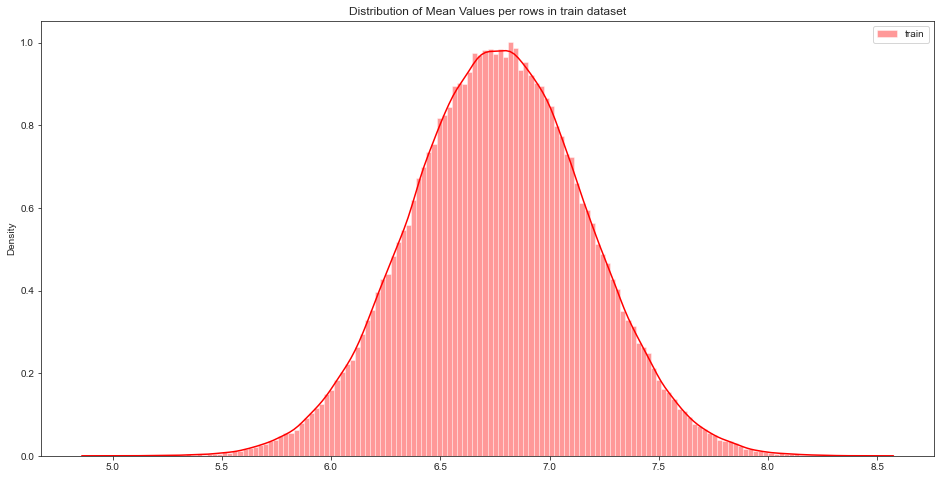

Wall time: 2.73 s


In [157]:
%%time
#Distribution of Mean Values per columns in train dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=df.columns.values[2:202]

#Distribution plot for mean values per columns in train attributes:
sns.distplot(df[train_attributes].mean(axis=0),color='red',kde=True,bins=150,label='train')

plt.title('Distribution of Mean Values per columns in train dataset')
plt.legend()
plt.show()


#Distribution of Mean Values per rows in train dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for mean values per rows in train attributes:
sns.distplot(df[train_attributes].mean(axis=1),color='red',kde=True,bins=150,label='train')

plt.title('Distribution of Mean Values per rows in train dataset')
plt.legend()
plt.show()

**Distribution of Standard Deviation Values per rows & columns:**

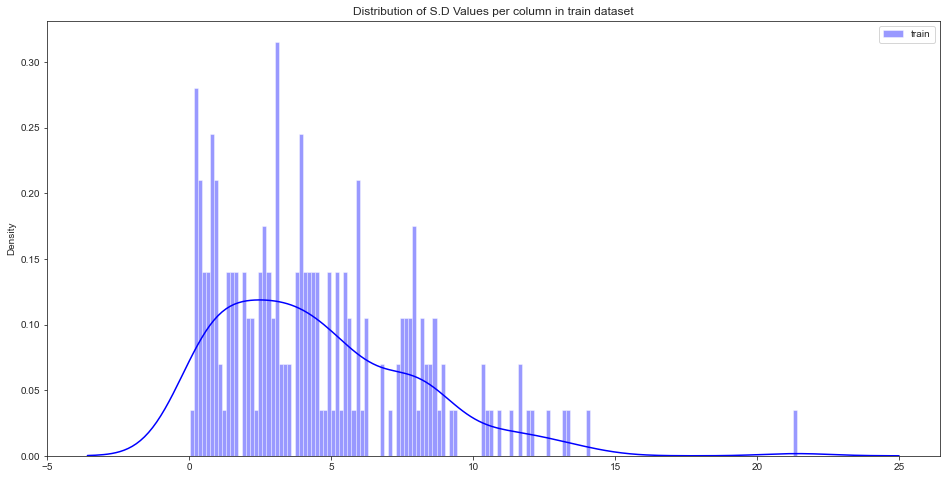

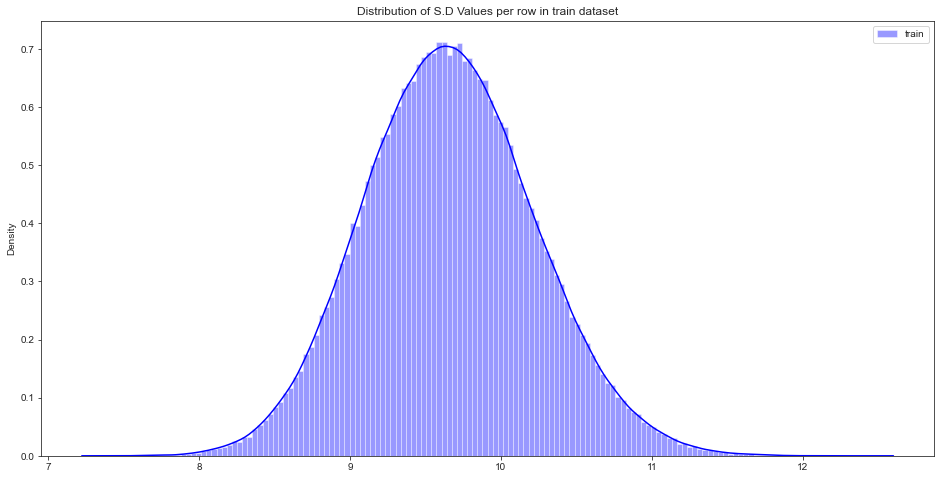

Wall time: 2.7 s


In [158]:
%%time
#Distribution of S.D Values per columns in train dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=df.columns.values[2:202]

#Distribution plot for S.D values per columns in train attributes:
sns.distplot(df[train_attributes].std(axis=0),color='blue',kde=True,bins=150,label='train')

plt.title('Distribution of S.D Values per column in train dataset')
plt.legend()
plt.show()


#Distribution of S.D Values per rows in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for S.D values per rows in train attributes:
sns.distplot(df[train_attributes].std(axis=1),color='blue',kde=True,bins=150,label='train')

plt.title('Distribution of S.D Values per row in train dataset')
plt.legend()
plt.show()

**Distribution of Skewness Values per rows & columns:**

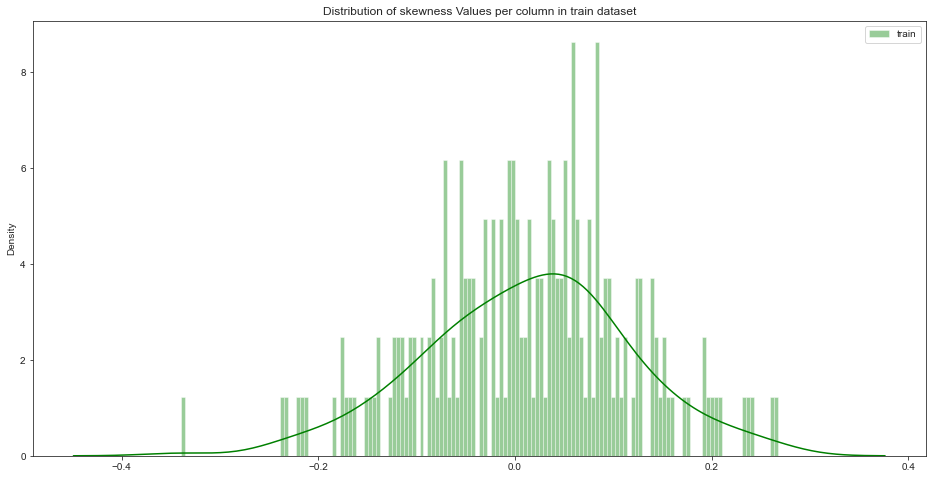

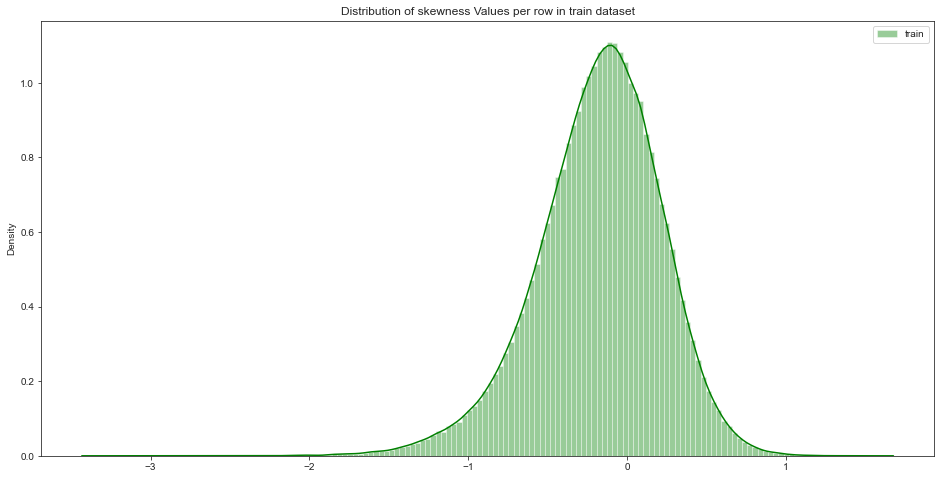

Wall time: 4.3 s


In [161]:
%%time
#Distribution of skew Values per columns in train dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=df.columns.values[2:202]

#Distribution plot for skew values per columns in train attributes:
sns.distplot(df[train_attributes].skew(axis=0),color='green',kde=True,bins=150,label='train')

plt.title('Distribution of skewness Values per column in train dataset')
plt.legend()
plt.show()


#Distribution of skew Values per rows in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for skew values per rows in train attributes:
sns.distplot(df[train_attributes].skew(axis=1),color='green',kde=True,bins=150,label='train')

plt.title('Distribution of skewness Values per row in train dataset')
plt.legend()
plt.show()

**Distribution of kurtosis Values per rows & columns:**

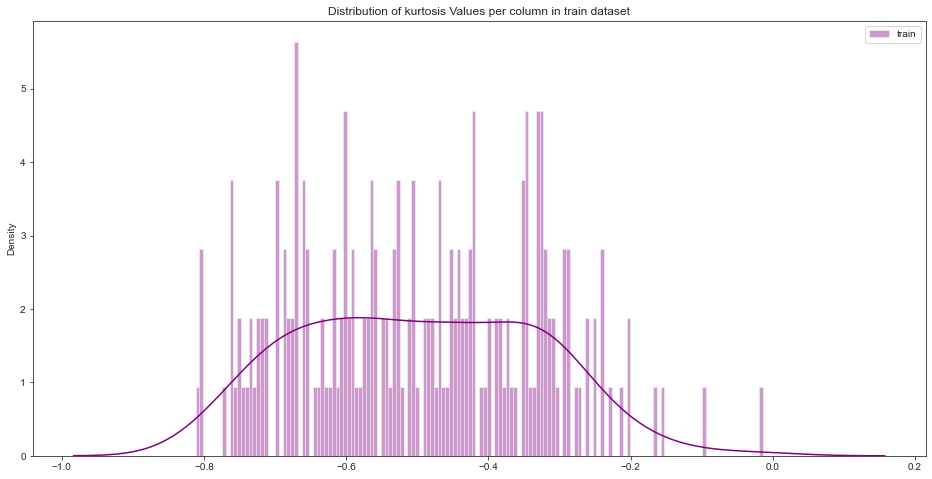

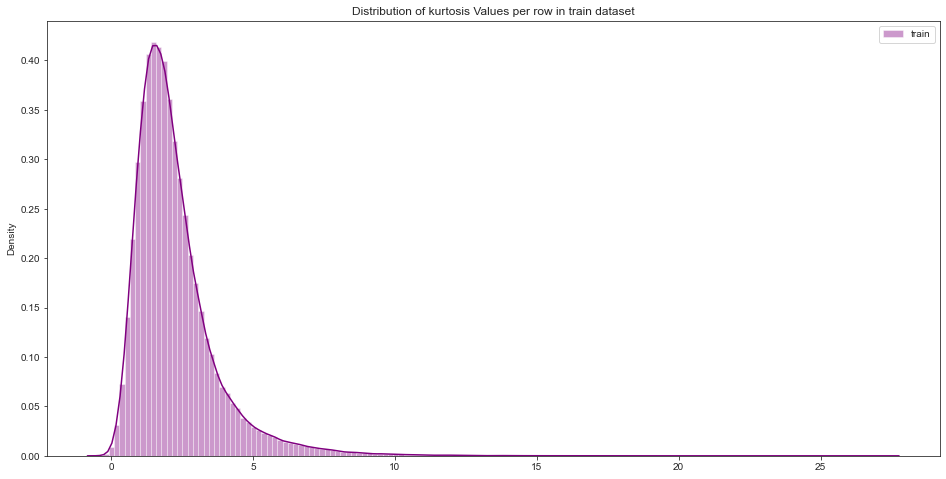

Wall time: 4.27 s


In [163]:
%%time
#Distribution of kurtosis Values per columns in train dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=df.columns.values[2:202]

#Distribution plot for kurtosis values per columns in train attributes:
sns.distplot(df[train_attributes].kurtosis(axis=0),color='purple',kde=True,bins=150,label='train')

plt.title('Distribution of kurtosis Values per column in train dataset')
plt.legend()
plt.show()


#Distribution of kurtosis Values per rows in train dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for kurtosis values per rows in train attributes:
sns.distplot(df[train_attributes].kurtosis(axis=1),color='purple',kde=True,bins=150,label='train')

plt.title('Distribution of kurtosis Values per row in train dataset')
plt.legend()
plt.show()

**Missing Value Analysis-**

In [164]:
%%time
#Finding the missing values in train & test dataset:-
train_missing=df.isnull().sum().sum()

print('Missing values in train data:',train_missing)

Missing values in train data: 0
Wall time: 84.6 ms


**Observation:** No missing value is present in both train & test data.

In [165]:
df.columns.values[2:202]

array(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13',
       'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19',
       'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25',
       'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31',
       'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37',
       'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43',
       'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49',
       'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55',
       'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61',
       'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67',
       'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73',
       'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79',
       'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85',
       'var_86', 'var_87', 'var_88', 'var_89', 'var_

In [166]:
train_attributes=df.columns.values[2:202]
df[train_attributes].corr().abs()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,0.002613,...,0.002752,0.000206,0.005373,0.001616,0.001514,0.002073,0.004386,0.000753,0.005776,0.003850
var_1,0.000544,1.000000,0.003980,0.000010,0.000303,0.000902,0.003258,0.001511,0.004098,0.000832,...,0.006627,0.003621,0.002604,0.001153,0.002557,0.000785,0.000377,0.004157,0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,0.000991,0.002648,0.001932,...,0.000197,0.001285,0.003400,0.000549,0.002104,0.001070,0.003952,0.001078,0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,0.000322,0.003253,0.000774,0.002500,0.003553,0.000826,...,0.000151,0.002445,0.001530,0.001699,0.001054,0.001206,0.002800,0.001164,0.001651,0.000506
var_4,0.001326,0.000303,0.000723,0.000322,1.000000,0.001368,0.000049,0.004549,0.001194,0.000918,...,0.001514,0.004357,0.003347,0.000813,0.000068,0.003706,0.000513,0.000046,0.001821,0.000786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.002073,0.000785,0.001070,0.001206,0.003706,0.001274,0.001244,0.001854,0.001396,0.000868,...,0.004571,0.000870,0.004745,0.003143,0.001201,1.000000,0.002517,0.004170,0.000536,0.002042
var_196,0.004386,0.000377,0.003952,0.002800,0.000513,0.002880,0.005378,0.001045,0.003242,0.000052,...,0.000847,0.002466,0.001386,0.005308,0.005040,0.002517,1.000000,0.000454,0.000253,0.000607
var_197,0.000753,0.004157,0.001078,0.001164,0.000046,0.000535,0.003565,0.003466,0.004583,0.003701,...,0.004974,0.000906,0.000527,0.005068,0.000884,0.004170,0.000454,1.000000,0.001183,0.004991
var_198,0.005776,0.004861,0.000877,0.001651,0.001821,0.000953,0.003025,0.000650,0.002950,0.002343,...,0.000153,0.000067,0.003451,0.001646,0.003194,0.000536,0.000253,0.001183,1.000000,0.004731


In [167]:
train_attributes=df.columns.values[2:202]
df[train_attributes].corr().abs().unstack()

var_0    var_0      1.000000
         var_1      0.000544
         var_2      0.006573
         var_3      0.003801
         var_4      0.001326
                      ...   
var_199  var_195    0.002042
         var_196    0.000607
         var_197    0.004991
         var_198    0.004731
         var_199    1.000000
Length: 40000, dtype: float64

In [195]:
train_attributes=df.columns.values[2:202]
train_correlation=df[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()

In [223]:
train_correlation.iloc[np.where(train_correlation[0]==1)]

,level_0,level_1,0
39800,var_0,var_0,1.0
39801,var_197,var_197,1.0
39802,var_71,var_71,1.0
39803,var_70,var_70,1.0
39804,var_69,var_69,1.0
...,...,...,...
39995,var_128,var_128,1.0
39996,var_127,var_127,1.0
39997,var_126,var_126,1.0
39998,var_124,var_124,1.0


In [238]:
filtered_index_1=train_correlation.loc[(train_correlation['level_0'] != train_correlation['level_1'])].index
filtered_index_1=np.array(filtered_index_1)
filtered_index_1

array([    0,     1,     2, ..., 39797, 39798, 39799], dtype=int64)

In [239]:
filtered_index_2=train_correlation.iloc[np.where(train_correlation[0]==1)].index
filtered_index_2=np.array(filtered_index_2)
filtered_index_2

array([39800, 39801, 39802, 39803, 39804, 39805, 39806, 39807, 39808,
       39809, 39810, 39811, 39812, 39813, 39814, 39815, 39816, 39817,
       39818, 39819, 39820, 39821, 39822, 39823, 39824, 39825, 39826,
       39827, 39828, 39829, 39830, 39831, 39832, 39833, 39834, 39835,
       39836, 39837, 39838, 39839, 39840, 39841, 39842, 39843, 39844,
       39845, 39846, 39847, 39848, 39849, 39850, 39851, 39852, 39853,
       39854, 39855, 39856, 39857, 39858, 39859, 39860, 39861, 39862,
       39863, 39864, 39865, 39866, 39867, 39868, 39869, 39870, 39871,
       39872, 39873, 39874, 39875, 39876, 39877, 39878, 39879, 39880,
       39881, 39882, 39883, 39884, 39885, 39886, 39887, 39888, 39889,
       39890, 39891, 39892, 39893, 39894, 39895, 39896, 39897, 39898,
       39899, 39900, 39901, 39902, 39903, 39904, 39905, 39906, 39907,
       39908, 39909, 39910, 39911, 39912, 39913, 39914, 39915, 39916,
       39917, 39918, 39919, 39920, 39921, 39922, 39923, 39924, 39925,
       39926, 39927,

In [240]:
pd.Series(filtered_index_1).isin(filtered_index_2).any()

False

**Observation:** Its visible that correlation between test attributes is very small.

In [241]:
df[train_attributes].corr()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,-0.000868,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,0.000052,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,0.003701,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,0.002343,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


**Correlation between the attributes:**

In [243]:
train_correlation[train_correlation['level_0']!=train_correlation['level_1']]

,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
...,...,...,...
39795,var_165,var_81,9.713658e-03
39796,var_53,var_148,9.787532e-03
39797,var_148,var_53,9.787532e-03
39798,var_26,var_139,9.844361e-03


In [242]:
%%time
#Correlation in train attiributes-
train_attributes=df.columns.values[2:202]
train_correlation=df[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
train_correlation=train_correlation[train_correlation['level_0']!=train_correlation['level_1']]
print(train_correlation.head(10))
print(train_correlation.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844
Wall time: 20.7 s


In [246]:
print(max(train_correlation[0]))
print(min(train_correlation[0]))

0.009844361358419583
2.7039750566243827e-08


**Correlation plot for train data:**

In [249]:
df[train_attributes].corr().values

array([[ 1.00000000e+00, -5.43699242e-04,  6.57283380e-03, ...,
        -7.52742660e-04, -5.77569697e-03,  3.84992785e-03],
       [-5.43699242e-04,  1.00000000e+00,  3.98049419e-03, ...,
        -4.15696088e-03, -4.86095600e-03,  2.28711963e-03],
       [ 6.57283380e-03,  3.98049419e-03,  1.00000000e+00, ...,
         1.07818769e-03, -8.77067189e-04,  3.85483163e-03],
       ...,
       [-7.52742660e-04, -4.15696088e-03,  1.07818769e-03, ...,
         1.00000000e+00,  1.18252363e-03,  4.99055495e-03],
       [-5.77569697e-03, -4.86095600e-03, -8.77067189e-04, ...,
         1.18252363e-03,  1.00000000e+00, -4.73055989e-03],
       [ 3.84992785e-03,  2.28711963e-03,  3.85483163e-03, ...,
         4.99055495e-03, -4.73055989e-03,  1.00000000e+00]])

In [247]:
df[train_attributes].corr().values.flatten()

array([ 1.00000000e+00, -5.43699242e-04,  6.57283380e-03, ...,
        4.99055495e-03, -4.73055989e-03,  1.00000000e+00])

In [254]:
df[train_attributes].corr().values.flatten()!=1

array([False,  True,  True, ...,  True,  True, False])

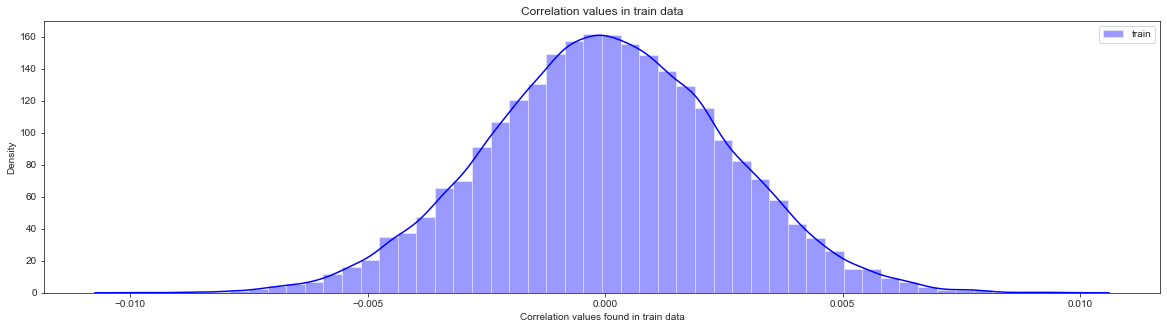

In [248]:
train_correlation=df[train_attributes].corr()
train_correlation=train_correlation.values.flatten()
train_correlation=train_correlation[train_correlation!=1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlation,color="blue",label="train")
plt.xlabel("Correlation values found in train data")
plt.ylabel("Density")
plt.title ("Correlation values in train data")
plt.legend()

**Feature Engineering :-**
Performing feature engineering by using-
    - Permutation Importance
    - Partial dependence plots

In [255]:
#Training & testing data:
X=df.drop(columns=['ID_code','target'],axis=1)
y=df['target']

**Building a simple model to find the features which are more important:**

In [256]:
#Split the train data:-
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

**Random Forest Classifier:-**

In [258]:
%%time
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)

#fitting the model:-
rf_model.fit(X_test,y_test)

Wall time: 16 s


RandomForestClassifier(n_estimators=10, random_state=42)

**Calucating weights & Observing some Important features via using eli5 library-** ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions.

In [259]:
%%time
#Permutation Importance:-
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=42)

#fitting the model:-
perm_imp.fit(X_test,y_test)

Wall time: 3min 29s


PermutationImportance(estimator=RandomForestClassifier(n_estimators=10,
                                                       random_state=42),
                      random_state=42)

In [261]:
#Important Features:-
eli5.show_weights(perm_imp,feature_names=X_test.columns.tolist(),top=200)

Weight,Feature
0.0190 ± 0.0009,var_81
0.0174 ± 0.0005,var_139
0.0129 ± 0.0006,var_110
0.0112 ± 0.0008,var_53
0.0102 ± 0.0002,var_44
0.0094 ± 0.0004,var_76
0.0080 ± 0.0008,var_2
0.0077 ± 0.0009,var_148
0.0076 ± 0.0003,var_170
0.0076 ± 0.0003,var_12


**Observation:-**
    - Importance of features is decreasing as we move down the top of column.
    - Fetaures showing in green indicates they are having positive impact on our prediction.
    - Features showing in white showing they have no impact on prediction.
    - Most imprtant feature is var_81.

**Handling of imblanced data:-** We are going to use multiple approaches for dealing with imbalanced datasets.
    
    - Change of performance matrix.
    - Oversample minority class.
    - Undersample majority class.
    - SMOTE ( Synthetic Minority Oversampling technique)
    - Change of algorithm.

**Logistic Regression Model:-**

In [262]:
#Spliting the data via Sratified KFold Cross Validator:-

#Training Data:
X=df.drop(['ID_code','target'],axis=1)
Y=df['target']

#Stratified KFold Cross Validator:-
skf=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, valid_index in skf.split(X,Y): 
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] 
    y_train, y_valid = Y.iloc[train_index], Y.iloc[valid_index]
    
print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (160000, 200)
Shape of X_valid : (40000, 200)
Shape of y_train : (160000,)
Shape of y_valid : (40000,)


In [263]:
%%time
lr_model=LogisticRegression(random_state=42)
#fitting the model-
lr_model.fit(X_train,y_train)

Wall time: 6.34 s


LogisticRegression(random_state=42)

In [264]:
#Accuracy of model-
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of lr_model :',lr_score)

Accuracy of lr_model : 0.9121875


In [265]:
%%time
#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(lr_model,X_valid,y_valid,cv=5)
#Cross validation score-
cv_score=cross_val_score(lr_model,X_valid,y_valid,cv=5)
print('cross val score :',np.average(cv_score))

cross val score : 0.9103
Wall time: 11.5 s


- Accuracy of the model is not th best metric to use while evaluating the imbalanced datasets as it may be misleading.
  We are going to change the performance metric.

**Confusion Matrix:-**

In [266]:
#Confusion matrix:-
cm=confusion_matrix(y_valid,cv_predict)
cm=pd.crosstab(y_valid,cv_predict)
cm

col_0,0,1
target,,
0,35493,487
1,3101,919


In [267]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_valid,cv_predict)
print('ROC Score:',roc_score)

ROC Score: 0.607535833893346


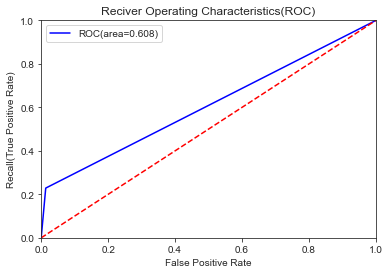

AUC: 0.607535833893346


In [268]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

**Observation:-** On comparing roc_auc_score and model accuracy, model is not performing well on imbalanced data.

In [269]:
#Classification report:-
classification_scores=classification_report(y_valid,cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.65      0.23      0.34      4020

    accuracy                           0.91     40000
   macro avg       0.79      0.61      0.65     40000
weighted avg       0.89      0.91      0.89     40000



**Observation:-** As we see that f1 score is high for the customers who will not make a transaction, compare to those who will make a transaction.
    So, we are going to change the algorithm.

**Oversample Minority Class:-** 

    -Adding more copies of minority class.
    -It can be a good option we dont have that much large data to work.
    -Drawback of this process is we are adding info. That can lead to overfitting or poor performance on test data.

**Undersample Mojorityclass:-**
    
    -Removing some copies of majority class.
    -It can be a good option if we have very large amount of data say in millions to work.
    -Drawback of this process is we are removing some valuable info. that can leads to underfitting & poor performance on        test data.

As per the drawbacks of both the model we will use SMOTE ( Synthetic Minority Oversampling technique) that is more best than the above as compare to above one's.

**SMOTE ( Synthetic Minority Oversampling technique):-** This is a statistical technique for increasing the number of cases in your dataset in a balanced way. It uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.

In [270]:
%%time
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=42, sampling_strategy=1.0)
#Generating synthetic data points
X_smote,y_smote=sm.fit_resample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_resample(X_valid,y_valid)

Wall time: 9.89 s


**Building Logistsic regression model on synthetic data points:-**

In [271]:
%%time
#Logistic regression model for SMOTE:-
smote=LogisticRegression(random_state=42)
#fitting the smote model:-
smote.fit(X_smote,y_smote)

Wall time: 13.3 s


LogisticRegression(random_state=42)

In [272]:
#Accuracy of the model:-
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.7888856463917956


In [273]:
%%time
#Cross validation prediction for SMOTE:-
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score:-
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('Cross validation score :',np.average(cv_score))

Cross validation score : 0.7959560867148415
Wall time: 23.7 s


In [274]:
%%time
#Confusion matrix:-
cm=confusion_matrix(y_smote_v,cv_pred)
cm=pd.crosstab(y_smote_v,cv_pred)

Wall time: 87.1 ms


In [275]:
cm

col_0,0,1
target,,
0,28196,7784
1,6899,29081


In [276]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score:',roc_score)

ROC score: 0.7959560867148416


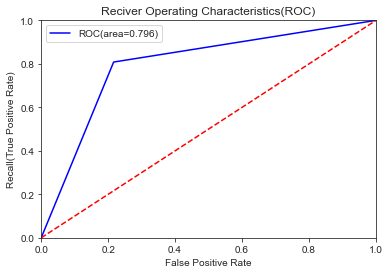

AUC: 0.7959560867148416


In [277]:
#ROC_AUC Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

**Classification Report:-**

In [278]:
#Classification Report:-
scores=classification_report(y_smote_v,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35980
           1       0.79      0.81      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



Observation:- As we see that f1 score is high for the customers who will not make a transaction, as well as who will make a transaction. 

**Light GBM:-** It is a gradient boosting framework that uses tree based learning algorithm.

In [279]:
#Training data-
lgb_train=lgb.Dataset(X_train,label=y_train)

#Validation data-
lgb_valid=lgb.Dataset(X_valid,label=y_valid)

In [280]:
#Selecting best hyperparameters by tuning of different parameters:-
params={'boosting_type': 'gbdt', 
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

In [281]:
#Training lgbm model:-
num_rounds=10000
lgbm= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_valid],verbose_eval=1000,early_stopping_rounds = 5000)
lgbm

[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 16078, number of negative: 143922
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.115581 seconds.
You ca

**Plotting of important Features:-**

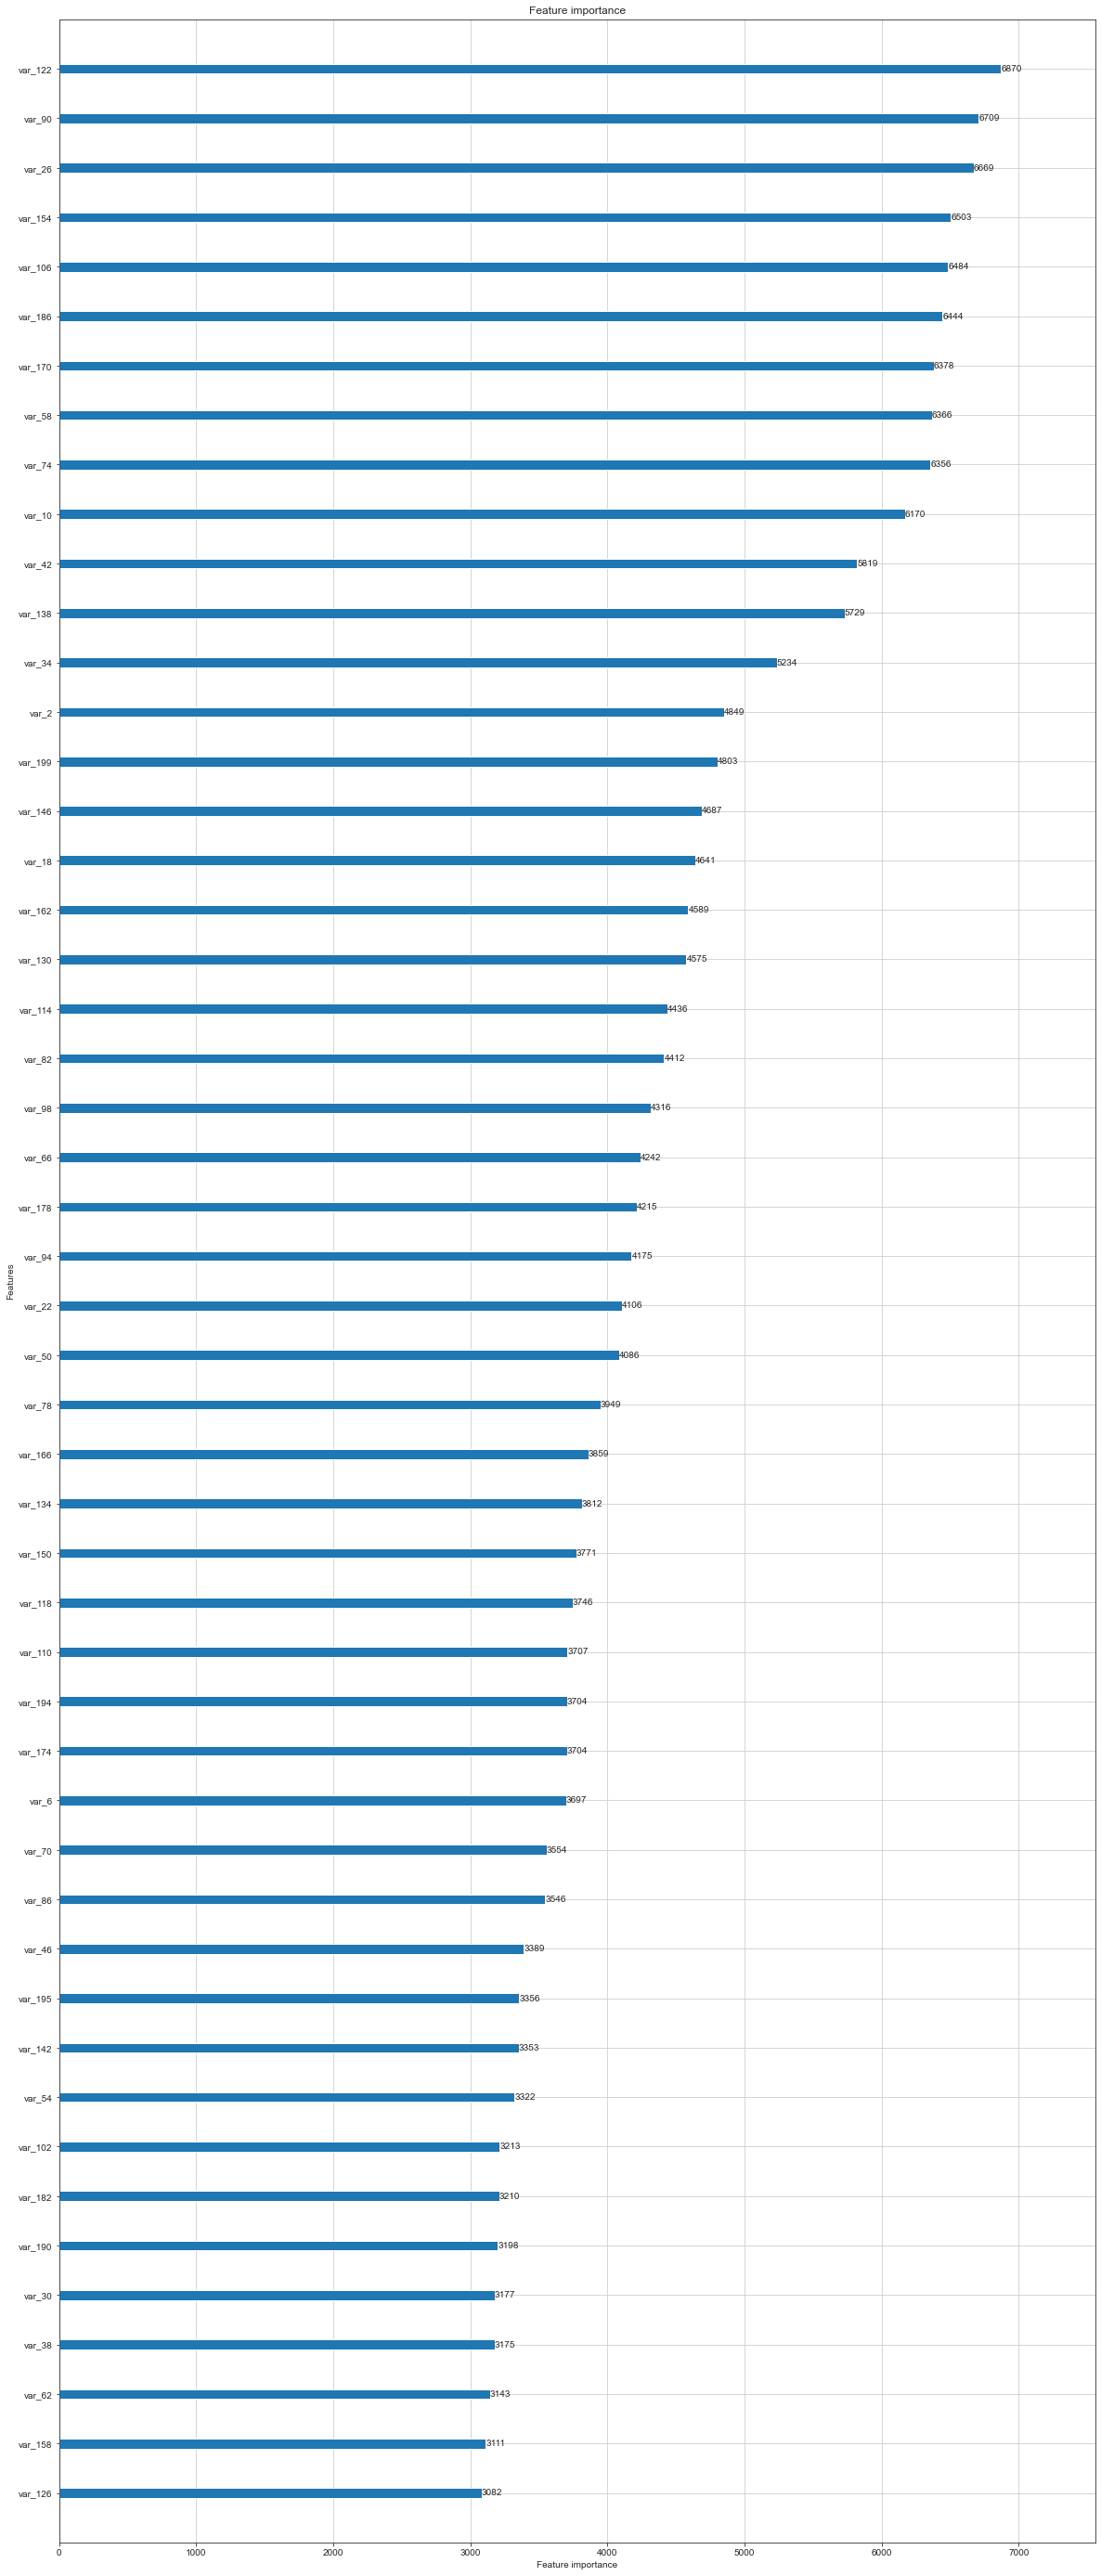

In [282]:
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(20,50))

**Conclusion:-** We have tried with diff model like Logistic regression,smote & lightgbm. But we observed that light gbm is performing well on imbalanced data as compare to other models based on the roc_auc scores.